## Orbiting Satellite 

### Task: Plot the path of a satellite around the Earth

Physics goals: practice the Law of Universal Graviation, revisit vectors (values, magnitudes, and unit vectors, rhat)

Coding goals: Functions, if statements, review Euler-Cromer, review plotting


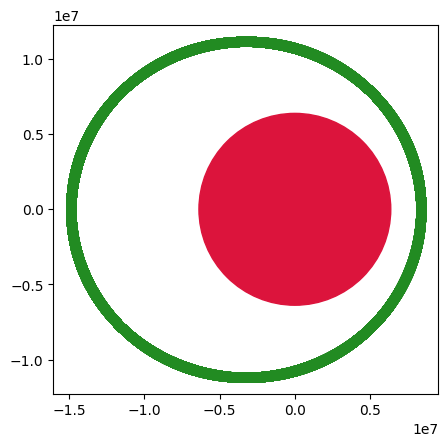

In [19]:
import numpy as np
import matplotlib.pyplot as plt

#define constants
G = 6.67E-11 # what is this?  Its the gravitational constant
M = 5.97E+24 # what is this? Mass of the earth
m = 2000 # what is this? Assuming a medium satelite using this list https://en.wikipedia.org/wiki/Small_satellite
r_earth = 6.378E+6 #what is this? radius of the earth in meters

# setup the starting conditions
pos = np.array([2E+6 + r_earth, 0])  # what is this? in LEO, so 2000 km https://www.nasa.gov/leo-economy/faqs
v = np.array([0, 7800])    # what is this? starting with 7800 m/s from this https://en.wikipedia.org/wiki/Low_Earth_orbit 
posE = np.array([0, 0])  # what is this? Earth is at the origin

#time
t =  0 #seconds
dt = 0.1  # every frame move this time, seconds

# lists
xlist = [pos[0]] #unit
ylist = [pos[1]] #unit
vxlist = [v[0]] #unit
vylist = [v[1]] #unit
tlist = [t] #unit

def Gravity(m1, m2, pos1, pos2):
    r = pos2 - pos1 #setting up radius vector (from object 2 to object 1)
    rmag = np.linalg.norm(r) #normalizes the radius vector, gives us magnitude 
    rhat = r / rmag #unit vector for radius
    
    #define force object 2 exerts on object 1
    Force = G * m1 * m2 * (1 / rmag ** 2) * rhat

    return Force

# start simulation
# How long does it take to orbit the earth like this?
t_orbit = ((r_earth + pos[0]) * 2 * np.pi) / v[1]
while t < t_orbit * 2: 
    
    #Setting up initial values
    #posi = np.array([xlist[-1],ylist[-1]])
    #vi = np.array([vxlist[-1],vylist[-1]])

    #update position for Earth    
    Fnet = Gravity(m, M, pos, posE) #What is happening here? The net force is the force of gravity
    a = Fnet / m #What is happening here? F = ma, so a = F/m
    v = v + a * dt #What is happening here? updating velocity with euler cromer
    pos = pos + v * dt #What is happening here? updating position with euler cromer
    t += dt #What is happening here? update time
        
    # update our lists
    xlist.append(pos[0]) 
    ylist.append(pos[1])
    vxlist.append(v[0])
    vylist.append(v[1])
    tlist.append(t)




#plt.plot(r_earth*np.cos(np.linspace(0,2*np.pi,361)),r_earth*np.sin(np.linspace(0,2*np.pi,361)), color="crimson") #this code plots a circle for a given r_earth value
circle = plt.Circle((0,0), r_earth, color="crimson")
plt.gca().add_patch(circle)
plt.scatter(xlist, ylist, color="forestgreen") 
plt.axis('scaled')
plt.show()
